# classification using decision tree algorithm on iris


Iris Dataset: [https://en.wikipedia.org/wiki/Iris_flower_data_set]
* A simple dataset to learn the basics.
* 3 flowers of Iris species. [see images on wikipedia link above]
* 1936 by Ronald Fisher.
* Petal and Sepal: http://terpconnect.umd.edu/~petersd/666/html/iris_with_labels.jpg
*  Objective: Classify a new flower as belonging to one of the 3 classes given the 4 features.
* Importance of domain knowledge.
* Why use petal and sepal dimensions as features?
* Why do we not use 'color' as a feature?

In [1]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2022-10-30 09:31:57--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data’

iris.data           100%[===================>]   4.44K  --.-KB/s    in 0s      

2022-10-30 09:31:58 (101 MB/s) - ‘iris.data’ saved [4551/4551]



In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


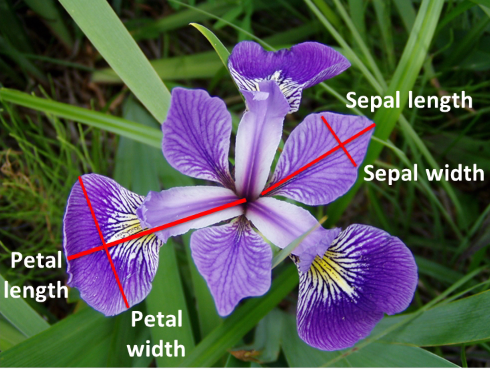

In [19]:
import imageio as iio
from IPython import display
display.Image("/content/drive/My Drive/M.Tech(DSA)/iris.png")

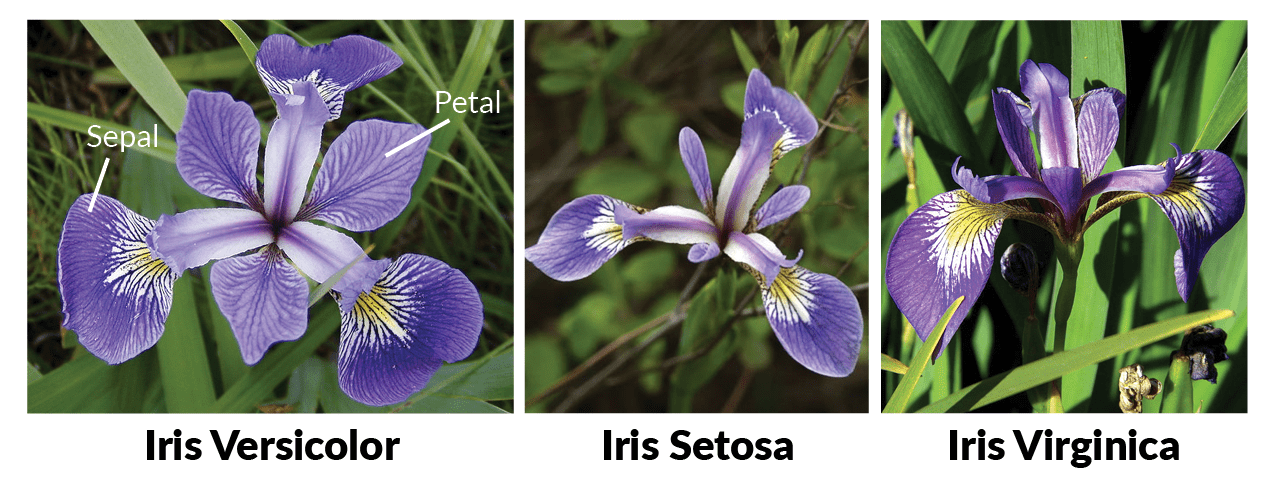

In [20]:
display.Image("/content/drive/My Drive/M.Tech(DSA)/iris_setosa_virginica_versicolor.png")

In [22]:
iris = pd.read_csv("iris.data", header=0, names = ["sepal length", "sepal width", "petal length", "petal width", "class"])
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [23]:
print(iris.shape)

(149, 5)


In [24]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  149 non-null    float64
 1   sepal width   149 non-null    float64
 2   petal length  149 non-null    float64
 3   petal width   149 non-null    float64
 4   class         149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [25]:
iris.describe()

,sepal length,sepal width,petal length,petal width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [27]:
iris["class"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: class, dtype: int64

In [28]:
iris.isnull()

,sepal length,sepal width,petal length,petal width,class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
144,False,False,False,False,False
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False


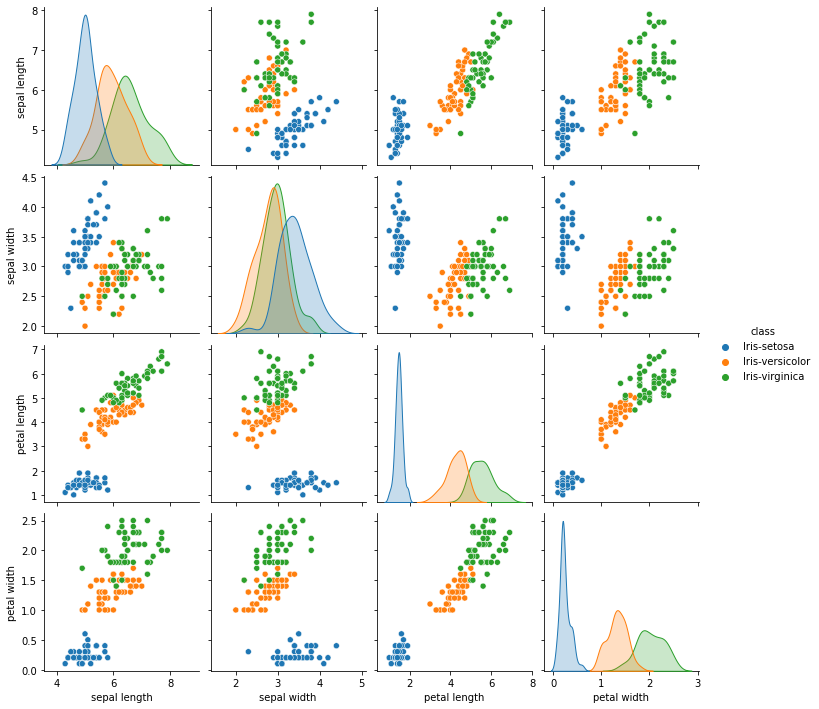

In [33]:
sns.pairplot(data=iris, hue="class")

[Text(0.4, 0.875, 'X[3] <= 0.8\ngini = 0.666\nsamples = 119\nvalue = [39, 41, 39]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.6, 0.625, 'X[3] <= 1.65\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.4, 0.375, 'X[2] <= 4.95\ngini = 0.127\nsamples = 44\nvalue = [0, 41, 3]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 41\nvalue = [0, 41, 0]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 36]')]

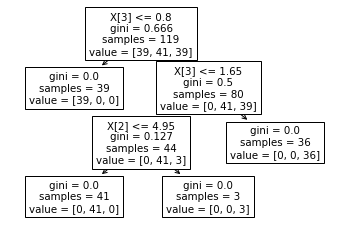

In [3]:
from sklearn import tree
from sklearn.model_selection import train_test_split
X, y = iris[["sepal length", "sepal width", "petal length", "petal width"]], iris["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf)

In [4]:
y_pred = clf.predict(X_test)

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9

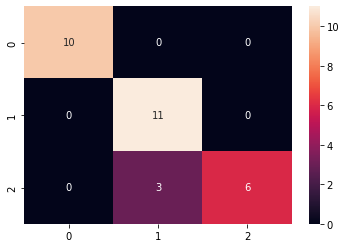

In [41]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred, labels=["Iris-setosa", "Iris-virginica", "Iris-versicolor"]), annot=True)